<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/EN/S01_Intro/sca_vibe_coding_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the following prompt to generate code


"**General instructions**: Generate Python code to perform the task below. Please organize the code in a simple way with comments to describe each line of code. If possible, please use mainly basic Python functionalities.

**Context**: I am a supply chain manager deciding how many Christmas trees to order.

**Inputs**:
*   Unit Cost: \$20
*   Selling Price: \$60
*   Unsold trees: \$0 value
*   Demand is normally distributed (Mean = 100, Std Dev = 20).

**Task**: Write a Python script to perform a Monte Carlo Simulation to find the best order quantity through the following steps.

**Steps**:
*   Step 1: Generate 10,000 random demand scenarios.
*   Step 2: Test a range of potential Order Quantities from 50 to 150.
*   Step 3: For each Order Quantity, calculate the expected profit across all 10,000 scenarios.
*   Step 4: Find the optimal order quantity that maximizes the average profit.
*   Step 5: Plot the results using (1) a line chart with 'Order Quantity' on the x-axis and 'Expected Profit' on the y-axis. Mark the peak profit with a red dot. and (2) a histogram showing the distribution of profit across all the scenarios.
"


# Task
Perform a Monte Carlo simulation to determine the optimal order quantity for Christmas trees, given a unit cost of $20, a selling price of $60, zero value for unsold trees, and a normally distributed demand with a mean of 100 and a standard deviation of 20. The simulation should generate 10,000 demand scenarios, test order quantities from 50 to 150, calculate the expected profit for each quantity, identify the optimal quantity, and visualize the results with an 'Order Quantity' vs. 'Expected Profit' line chart and a histogram of profit distribution for the optimal order quantity.

## Define Constants and Simulation Parameters

### Subtask:
Set up the unit cost, selling price, demand distribution parameters (mean and standard deviation), and the number of simulation scenarios.


**Reasoning**:
To define the constants and simulation parameters as specified in the instructions, I will create a code block to assign the given values to respective variables.



In [ ]:
unit_cost = 20  # Define unit cost of a Christmas tree
selling_price = 60  # Define selling price of a Christmas tree

demand_mean = 100  # Define the mean of the demand distribution
demand_std_dev = 20  # Define the standard deviation of the demand distribution

num_scenarios = 10000  # Define the number of simulation scenarios for Monte Carlo

## Simulate Demand Scenarios

### Subtask:
Generate 10,000 random demand scenarios using a normal distribution based on the given mean and standard deviation.


**Reasoning**:
To generate demand scenarios, I need to use the `numpy` library to create random numbers following a normal distribution. I will then store these in a variable and ensure all values are non-negative.



In [ ]:
import numpy as np # Import the numpy library for numerical operations

# Generate 10,000 random demand scenarios using a normal distribution
demand_scenarios = np.random.normal(loc=demand_mean, scale=demand_std_dev, size=num_scenarios)

# Ensure demand values are non-negative (demand cannot be less than 0)
demand_scenarios = np.maximum(0, demand_scenarios)
print("Generated demand scenarios.")

Generated demand scenarios.


## Define Profit Calculation Function

### Subtask:
Create a function to calculate the profit for a given order quantity and actual demand, considering unit cost, selling price, and zero value for unsold trees.


**Reasoning**:
To fulfill the subtask, I need to define a Python function that calculates profit based on order quantity, actual demand, unit cost, and selling price. This function will incorporate the logic for units sold, revenue, cost, and ultimately, profit.



In [ ]:
def calculate_profit(order_quantity, actual_demand, unit_cost, selling_price):
    # Calculate the number of units sold, which is the minimum of order quantity and actual demand
    units_sold = min(order_quantity, actual_demand)

    # Calculate the revenue from the units sold
    revenue = units_sold * selling_price

    # Calculate the total cost based on the order quantity
    cost = order_quantity * unit_cost

    # Calculate the profit
    profit = revenue - cost

    # Return the calculated profit
    return profit

print("Profit calculation function defined.")

Profit calculation function defined.


## Simulate Profits for a Range of Order Quantities

### Subtask:
Iterate through a range of potential order quantities (from 50 to 150 in increments of 1), and for each order quantity, calculate the average profit across all 10,000 simulated demand scenarios using the `calculate_profit` function.

#### Instructions
1. Define the range of order quantities to test, for example, from 50 to 150 (inclusive).
2. Initialize an empty list to store the average profit for each order quantity.
3. Loop through each order quantity in the defined range.
4. Inside the loop, for each `order_quantity`, iterate through all `demand_scenarios`.
5. For each scenario, calculate the profit using the `calculate_profit` function.
6. After iterating through all scenarios for a given `order_quantity`, calculate the average profit and store it.


**Reasoning**:
To simulate profits for a range of order quantities, I will iterate through the specified range, calculate the profit for each demand scenario using the `calculate_profit` function, and then store the average profit for each order quantity.



In [ ]:
order_quantities_to_test = range(50, 151) # Define the range of order quantities from 50 to 150 (inclusive)

# Initialize lists to store order quantities and their corresponding average profits
order_quantities = []
average_profits = []

# Loop through each potential order quantity
for order_quantity in order_quantities_to_test:
    # Initialize a list to store profits for the current order quantity across all scenarios
    profits_for_quantity = []

    # Loop through each demand scenario
    for actual_demand in demand_scenarios:
        # Calculate the profit for the current order quantity and actual demand
        profit = calculate_profit(order_quantity, actual_demand, unit_cost, selling_price)
        profits_for_quantity.append(profit)

    # Calculate the average profit for the current order quantity across all scenarios
    avg_profit = np.mean(profits_for_quantity)

    # Store the order quantity and its average profit
    order_quantities.append(order_quantity)
    average_profits.append(avg_profit)

print("Simulation for profits across different order quantities completed.")

Simulation for profits across different order quantities completed.


**Reasoning**:
The previous step calculated the average profits for a range of order quantities. Now, I need to find the optimal order quantity that yields the maximum average profit by identifying the index of the maximum profit and retrieving the corresponding order quantity.



In [ ]:
max_profit_index = np.argmax(average_profits) # Find the index of the maximum average profit
optimal_order_quantity = order_quantities[max_profit_index] # Get the order quantity corresponding to the maximum profit
peak_profit = average_profits[max_profit_index] # Get the peak profit value

print(f"Optimal Order Quantity: {optimal_order_quantity}")
print(f"Maximum Average Profit: {peak_profit:.2f}")

Optimal Order Quantity: 108
Maximum Average Profit: 3558.28


## Visualize Simulation Results

### Subtask:
Plot the results using (1) a line chart with 'Order Quantity' on the x-axis and 'Expected Profit' on the y-axis. Mark the peak profit with a red dot. and (2) a histogram showing the distribution of profit across all the scenarios for the optimal order quantity.

#### Instructions
1.  **Line Chart**: Plot `order_quantities` on the x-axis and `average_profits` on the y-axis. Add appropriate labels and a title. Mark the `optimal_order_quantity` and `peak_profit` with a red dot.
2.  **Histogram**: Calculate the profits for the `optimal_order_quantity` across all `demand_scenarios` and create a histogram of these profits. Add appropriate labels and a title.

**Reasoning**:
To visualize the simulation results as requested in the subtask, I will use `matplotlib.pyplot` to create both a line chart showing the expected profit across different order quantities and a histogram for the profit distribution at the optimal order quantity. This will involve calculating profits specifically for the optimal quantity to generate the histogram data.



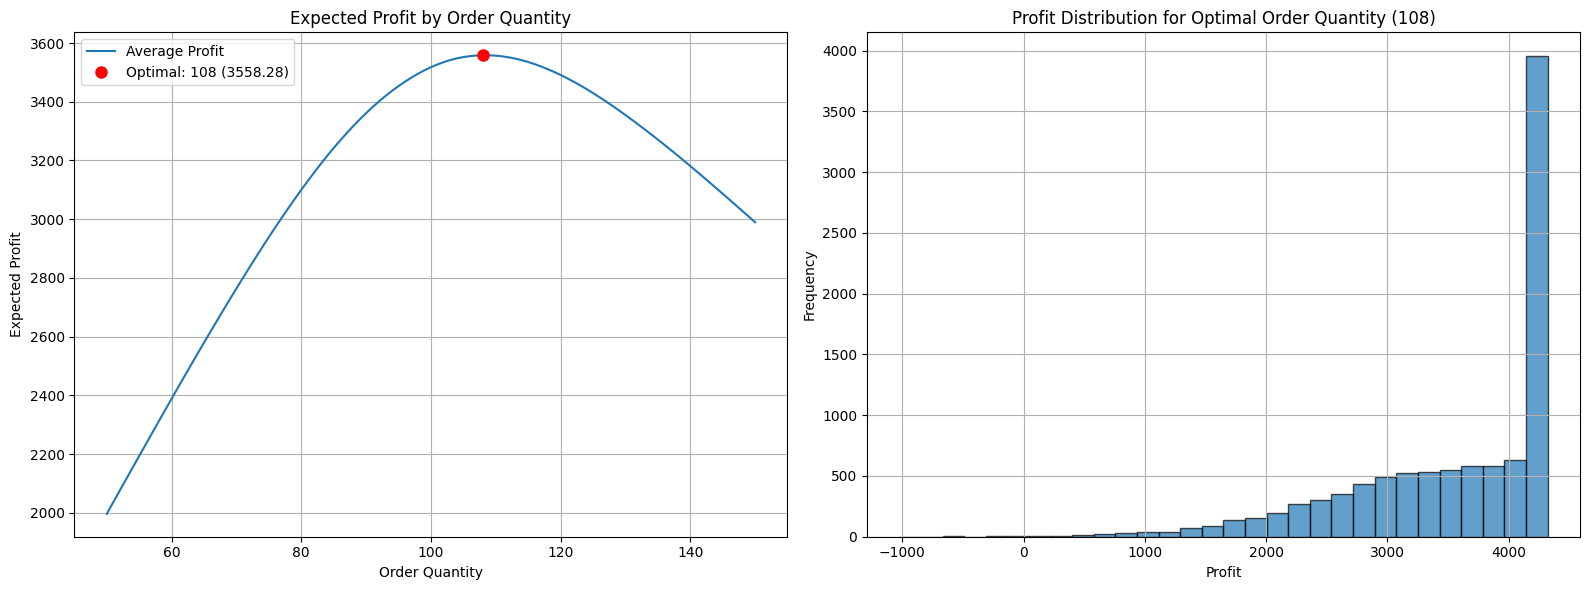

Simulation results visualized: line chart and histogram displayed.


In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib library for plotting

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Expected Profit vs. Order Quantity (Line Chart) ---
# Plot the average profits against the order quantities
axes[0].plot(order_quantities, average_profits, label='Average Profit')

# Mark the optimal order quantity and peak profit with a red dot
axes[0].plot(optimal_order_quantity, peak_profit, 'ro', markersize=8, label=f'Optimal: {optimal_order_quantity} ({peak_profit:.2f})')

# Add labels and title to the first subplot
axes[0].set_xlabel('Order Quantity')
axes[0].set_ylabel('Expected Profit')
axes[0].set_title('Expected Profit by Order Quantity')
axes[0].legend()
axes[0].grid(True)

# --- Plot 2: Histogram of Profit Distribution for Optimal Order Quantity ---
# Calculate profits for the optimal order quantity across all demand scenarios
profits_at_optimal_quantity = [
    calculate_profit(optimal_order_quantity, actual_demand, unit_cost, selling_price)
    for actual_demand in demand_scenarios
]

# Plot a histogram of the profits at the optimal order quantity
axes[1].hist(profits_at_optimal_quantity, bins=30, edgecolor='black', alpha=0.7)

# Add labels and title to the second subplot
axes[1].set_xlabel('Profit')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Profit Distribution for Optimal Order Quantity ({optimal_order_quantity})')
axes[1].grid(True)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()

print("Simulation results visualized: line chart and histogram displayed.")

## Summary:

### Data Analysis Key Findings
*   The simulation utilized 10,000 demand scenarios, with a unit cost of \$20 and a selling price of \$60. Demand was normally distributed with a mean of 100 and a standard deviation of 20.
*   The optimal order quantity determined by the Monte Carlo simulation is **108 units**.
*   This optimal order quantity yields a maximum average profit of **\$3558.28** across the simulated demand scenarios.
*   The results were visualized with a line chart showing expected profit across order quantities (50-150) and a histogram displaying the distribution of profits specifically for the optimal order quantity.

### Insights or Next Steps
*   The optimal order quantity (108) is slightly higher than the mean demand (100). This suggests that given the significant profit margin (\$40 per tree) compared to the cost of unsold inventory (cost of \$20 per tree, assuming zero salvage value), it is more profitable to slightly overstock than to risk understocking and missing out on potential sales.
*   Further analysis could explore the sensitivity of the optimal order quantity to changes in cost, selling price, or the standard deviation of demand, to understand how robust this optimal quantity is under different market conditions.
